In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc, volume_overlay
%matplotlib inline

# 2016年上半期の日経平均のデータを読み込む
start_date = "2016-01-01"
end_date = "2016-06-30"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))
df = df.join(pd.read_csv("n225.csv", index_col="Date", parse_dates=True))
df = df.dropna()

In [2]:
df

,Open,High,Low,Close,Adj Close,Volume
2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200.0
2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300.0
2016-01-06,18410.570313,18469.380859,18064.300781,18191.320313,18191.320313,142200.0
2016-01-07,18139.769531,18172.039063,17767.339844,17767.339844,17767.339844,168000.0
2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300.0
2016-01-12,17470.929688,17546.570313,17184.779297,17218.960938,17218.960938,178400.0
2016-01-13,17449.119141,17717.750000,17414.550781,17715.630859,17715.630859,145900.0
2016-01-14,17384.929688,17393.830078,16944.410156,17240.949219,17240.949219,178300.0
2016-01-15,17522.460938,17597.869141,17057.599609,17147.109375,17147.109375,173000.0
2016-01-18,16826.929688,17037.259766,16665.050781,16955.570313,16955.570313,157200.0


Text(0,0.5,'Price')

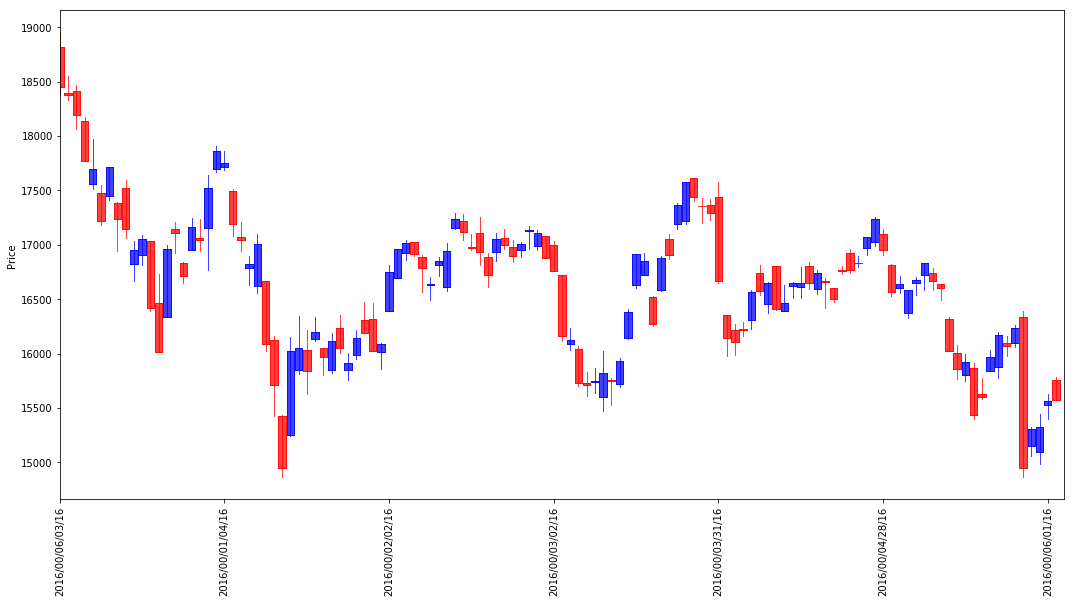

In [5]:
# ローソクだけをプロット
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(1, 1, 1)

# candlestick2を使って描画
candlestick2_ohlc(ax, df["Open"], df["High"], df["Low"], df["Adj Close"], width=0.9, colorup="b", colordown="r")

# 軸メモリやラベルを整える
ax.set_xticklabels([(df.index[int(x)].strftime("%Y/%M/%D") if x < df.shape[0] else x) for x in ax.get_xticks()], rotation=90)
ax.set_xlim([0, df.shape[0]]) # 横軸の範囲はデータの個数(df.shape[0]個)までに変更しておく
ax.set_ylabel("Price")

In [5]:
df.shape

(122, 6)

(0, 1362000.0)

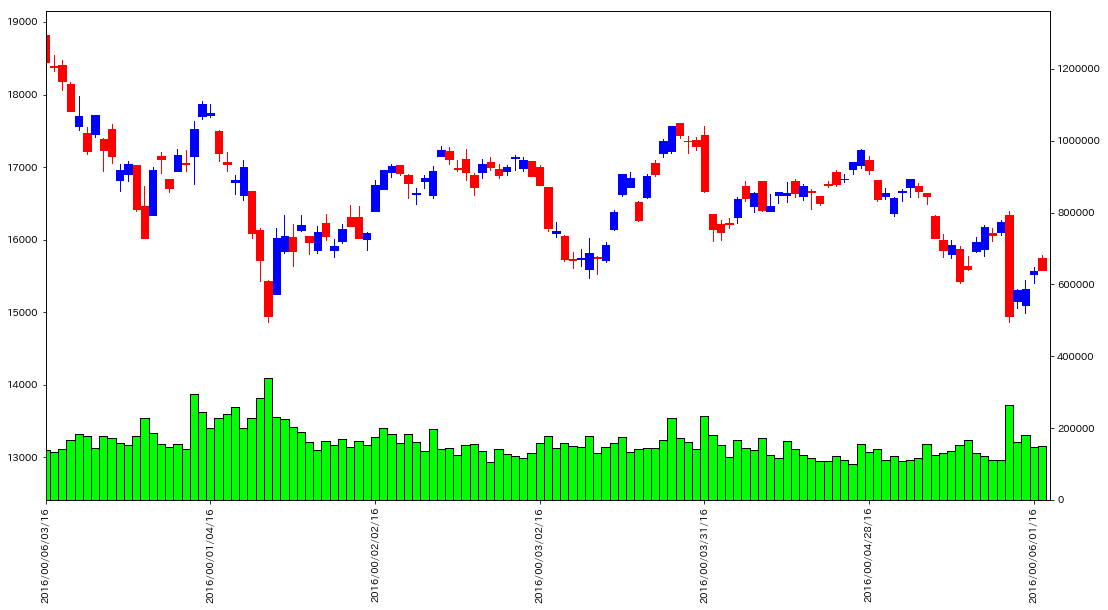

In [6]:
# ローソク足をプロット
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(1, 1, 1)
candlestick2_ohlc(ax, df["Open"], df["High"], df["Low"], df["Adj Close"], width=0.9, colorup="#0000ff", colordown="#ff0000", alpha=1.0)
ax.set_xticklabels([(df.index[int(x)].strftime("%Y/%M/%D") if x < df.shape[0] else x) for x in ax.get_xticks()], rotation=90)
ax.set_xlim([0, df.shape[0]]) # 横軸の範囲はデータの個数(df.shape[0]個)までに変更しておく
#ax.set_ylabel("Price")

# ローソク足を上側50%に収める
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - (top - bottom) / 2, top)


# 出来高のチャートをプロット
ax2 = ax.twinx()
volume_overlay(ax2, df["Open"], df["Adj Close"], df["Volume"], width=1, colorup="#00ff00", colordown="#00ff00", alpha=1.0)
ax2.set_xlim([0, df.shape[0]])

# 出来高チャートは下側25%に収める
ax2.set_ylim([0, df["Volume"].max() * 4])
#ax2.set_ylabel("Volume")

In [7]:
ax.get_xticks()

array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.])